##**Import Library**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

##**Load Dataset**

In [84]:
df = pd.read_csv('/content/House-Price-Prediction-clean.csv')
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


##**Eksploratory Data Analysis**

In [85]:
# Melihat informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [86]:
# Melihat dimensi data
df.shape

(1460, 32)

In [87]:
# cek data duplikat
df.duplicated().any()

False

###**Mengecek Missing Value**

In [88]:
df.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

<Axes: >

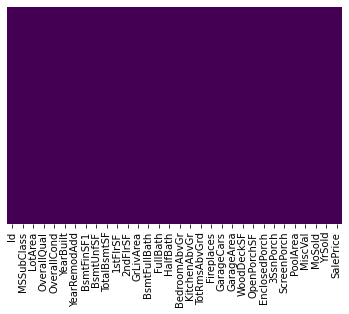

In [89]:
#Menyajikan visualisasi data
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

Bisa kita lihat bahwa pada dataset tersebut tidak memiliki data kosong

###**Mengecek Outlier**

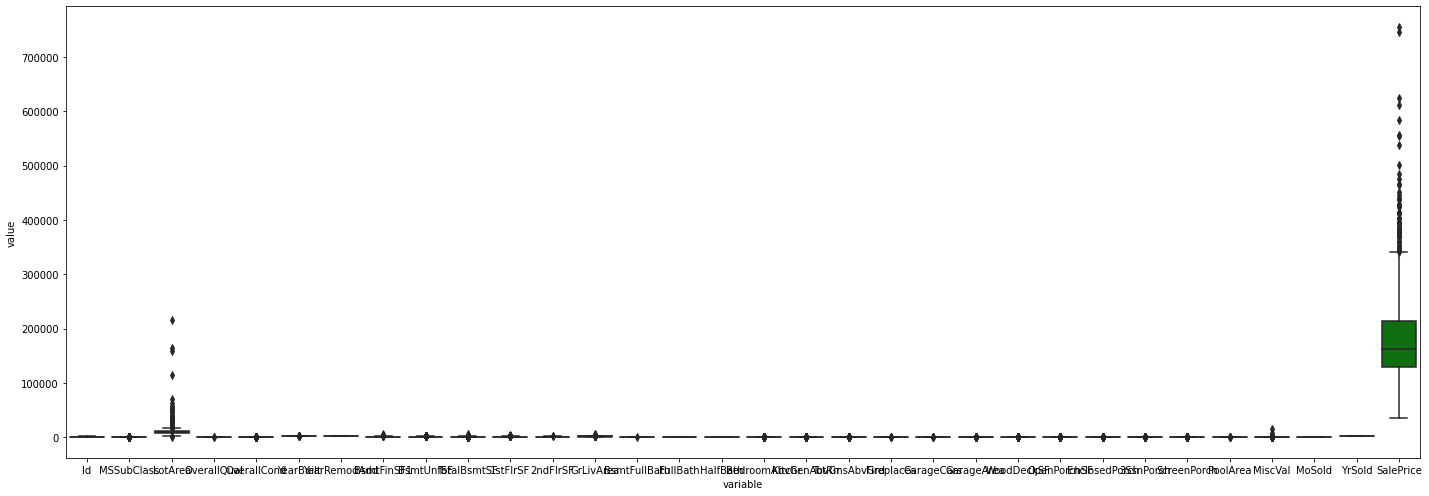

In [90]:
df_out = df.select_dtypes(include=['float64', 'int64'])
fig = plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', y = 'value', color = 'green', orient = 'v', data = pd.melt(df_out))
plt.tight_layout()

Outliers adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data (pencilan). Adanya data outliers ini akan membuat analisis terhadap serangkaian data menjadi bias, atau tidak mencerminkan fenomena yang sebenarnya. <br>
Pada gambar diatas terlihat bahwa terdapat outlier di beberapa kolom sehingga akan di hapus.

###**Melihat Korelasi Data**

In [91]:
k = len(df.columns)
cm = df.corr()

<Axes: title={'center': 'Korelasi Data'}>

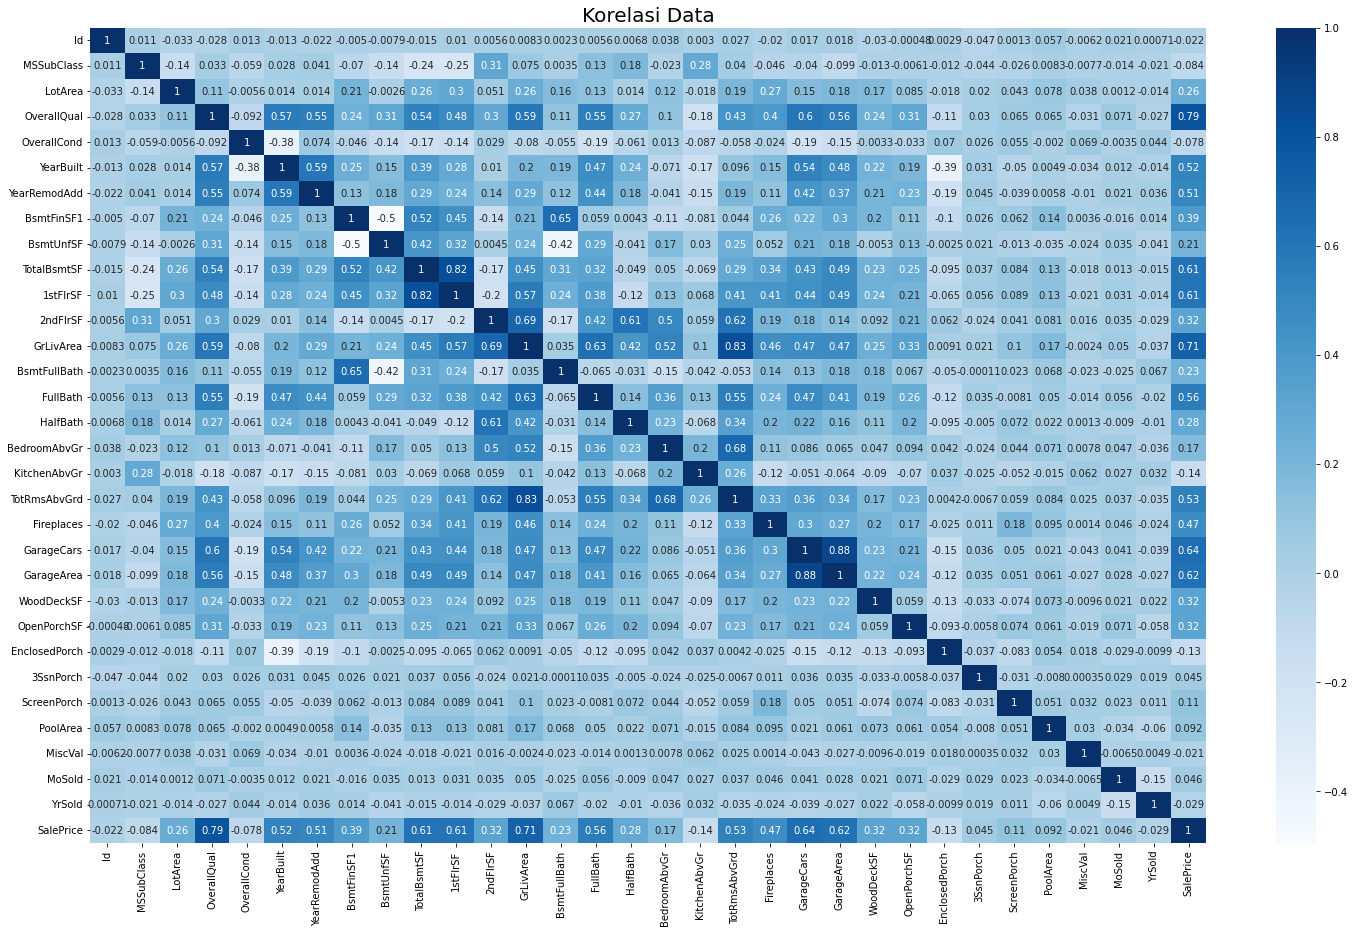

In [92]:
#Menyajikan Visualisasi Data
plt.figure(figsize=(25,15))
plt.title('Korelasi Data', size = 20)
sns.heatmap(cm, annot=True, cmap = 'Blues')

###**Melihat Statistik Data**

In [93]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##**Preprocessing Data**

###**Feature Selection**

Drop kolom yang tidak diperlukan

In [94]:
df = df.drop(['Id'], axis = 1)
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


###**Drop Outlier**

In [95]:
#Menghitung Skor IQR
sorted(df)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [96]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]
df_clear.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
2,60,11250,7,5,2001,2002,486,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
6,20,10084,8,5,2004,2005,1369,317,1686,1694,...,255,57,0,0,0,0,0,8,2007,307000
10,20,11200,5,5,1965,1965,906,134,1040,1040,...,0,0,0,0,0,0,0,2,2008,129500


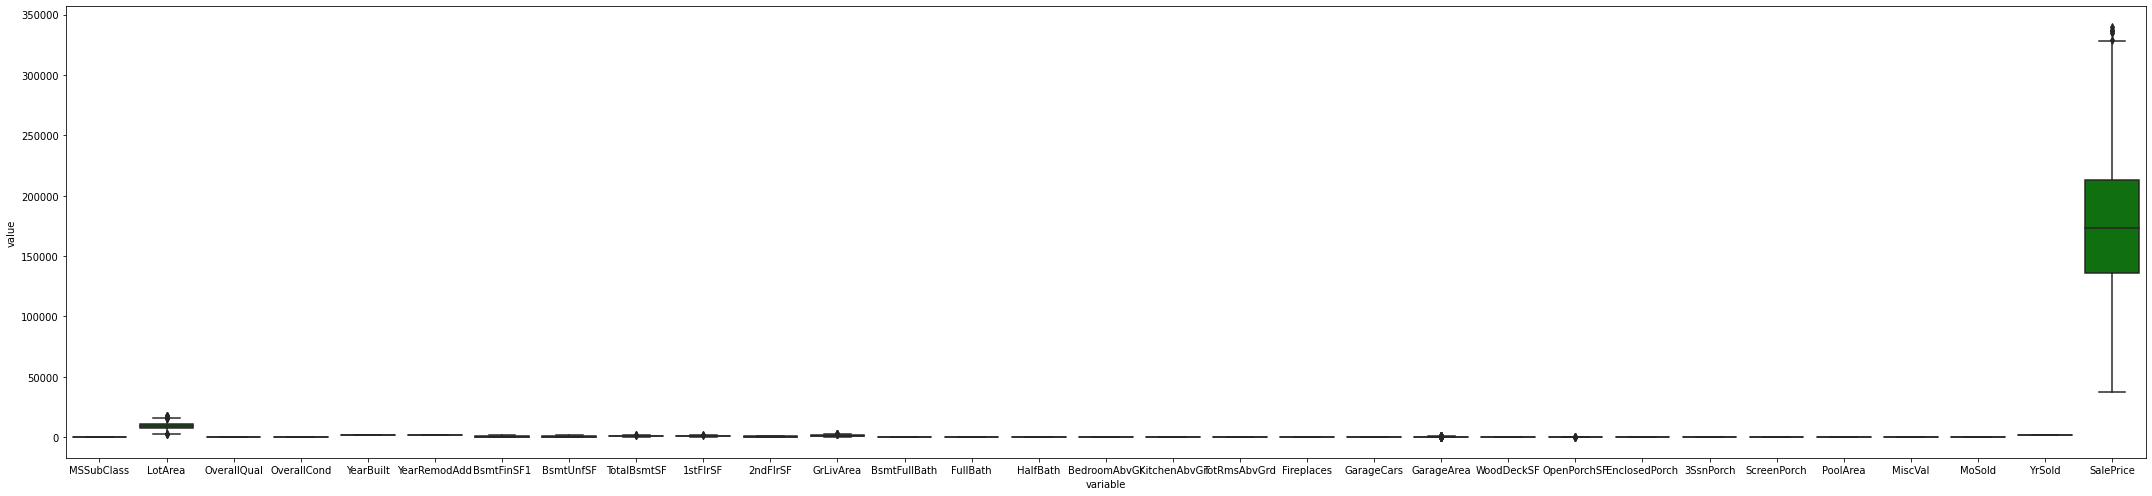

In [97]:
# Mengecek kembali
fig = plt.figure(figsize = (30,7))
sns.boxplot(x = 'variable', y = 'value', color = 'green', orient = 'v', data = pd.melt(df_clear))
plt.tight_layout()

###**Normalisasi Data**

Normalisasi data digunakan untuk mengskalakan nilai dalam rentang 0 - 1.

In [98]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns = df_clear.columns)
df_norm.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.4,0.378101,0.625,0.333333,0.939394,0.883333,0.436072,0.089820,0.338728,0.248958,...,0.000000,0.358824,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.565181
1,0.4,0.568409,0.625,0.333333,0.919192,0.866667,0.300185,0.259880,0.375723,0.287076,...,0.000000,0.247059,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0.614875
2,0.4,0.772990,0.750,0.333333,0.909091,0.833333,0.404571,0.293413,0.505780,0.421084,...,0.469438,0.494118,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,0.702667
3,0.0,0.489159,0.750,0.333333,0.949495,0.916667,0.845584,0.189820,0.818497,0.748064,...,0.623472,0.335294,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,0.891502
4,0.0,0.565011,0.375,0.333333,0.555556,0.250000,0.559605,0.080240,0.445087,0.358547,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.303462


###**Split Dataset**

In [99]:
# Menentukan variabel independent dan dependent
X = df_norm.drop(columns=['SalePrice'])
y = df_norm['SalePrice']

# Split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Jumlah data traing adalah:',len(X_train))
print('Jumlah data testing adalah:',len(X_test))

Jumlah data traing adalah: 563
Jumlah data testing adalah: 141


##**Modeling**

###**Linear Regression**

In [100]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = regressor.predict(X_test)

In [102]:
print("Akurasi Training: {:.2f}%".format(regressor.score(X_train, y_train)*100))
print("Akurasi Testing: {:.2f}%".format(regressor.score(X_test, y_test)*100))

Akurasi Training: 90.17%
Akurasi Testing: 87.49%


In [103]:
# mengevaluasi model dengan mae dan mse
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

Mean Absolute Error (MAE):  0.04935840397420629
Mean Squared Error (MSE):  0.004710050162587098


###**Random Forest Regressor**

In [106]:
regrf = RandomForestRegressor(n_estimators= 50, max_depth=4)
regrf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=50)

In [107]:
y_pred_rf = regrf.predict(X_test)

In [108]:
print("Akurasi Training: {:.2f}%".format(regrf.score(X_train, y_train)*100))
print("Akurasi Testing: {:.2f}%".format(regrf.score(X_test, y_test)*100))

Akurasi Training: 90.32%
Akurasi Testing: 87.18%


In [109]:
# mengevaluasi model dengan mae dan mse
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE): ", mae)
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE): ", mse)

Mean Absolute Error (MAE):  0.05025083508012821
Mean Squared Error (MSE):  0.004826737468323389


##**Kesimpulan**

Implementasi regresi pada project ini yaitu memprediksi harga rumah dengan menggunakan metode Linear Regression dan Random Forest Regressor. Dari kedua metode tersebut memperoleh hasil yang cukup baik dengan masing-masing akurasi sebagai berikut:


*   Metode Linear Regression menghasilkan akurasi sebesar 87.49% pada data testing
*   Metode Random Forest Regressor menghasilkan akurasi sebesar 87.18% pada data testing

Dari kedua hasil tersebut perbedaannya tidak terlalu signifikan, walaupun demikian dapat dikatakan bahwa metode Linear Regression lebih baik dibandingkan dengan metode Random Forest Regressor dalam memprediksi harga rumah.
